In [1]:
%matplotlib inline

import json
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
def collect(path, version):
    with open(path) as f:
        for line in f:
            record = json.loads(line)
            record['version'] = version
            yield record
            
ba12 = list(collect('data/ba_perf.12.3.json', '1.4.12.3'))
ba13 = list(collect('data/ba_perf.13.1.json', '1.4.13.1'))
len(ba12)

673

In [3]:
from pandas.io.json import json_normalize
ba12_data = json_normalize(ba12)
ba13_data = json_normalize(ba13)
all = pd.concat([ba12_data, ba13_data], axis=0)
len(all)

1347

In [4]:
all

,_id,app,browser,cell,code,createdAt.$date,dataset,events,extra.app,extra.browser,...,extra.type,extra.url,isNew,language,requestId,totalDuration,type,url,username,version
0,2Ct9YyCATyHZtzTjH,NaN,NaN,NaN,NaN,1459807972883,NaN,"[{u'timestamp': 1459807934342, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/narratives/57ZbPZSzyCHNGiBi...,NaN,NaN,NaN,199,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
1,2FmrCYeSmaQeCBBwM,NaN,NaN,NaN,NaN,1459807868791,NaN,"[{u'timestamp': 1459807830424, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/narratives/57ZbPZSzyCHNGiBi...,NaN,NaN,NaN,28,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
2,2LPSMdez3zoiZe5mp,NaN,NaN,NaN,NaN,1459808095786,NaN,"[{u'timestamp': 1459808057434, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://172.31.6.14/narratives/57ZbPZSzyCHNGiBi...,NaN,NaN,NaN,9,sq-autosuggest,NaN,testbot@adatao.com,1.4.12.3
3,2QE3dS5n8XNzwtdxa,NaN,NaN,NaN,NaN,1459808103770,NaN,"[{u'timestamp': 1459808065365, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://172.31.6.14/narratives/57ZbPZSzyCHNGiBi...,NaN,NaN,NaN,62,sq-autosuggest,NaN,testbot@adatao.com,1.4.12.3
4,2R3tMRacNQYLvD6t8,DASHBOARD,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,psxfyxZvnmPGaoFqG-c0bab8e1-062f-41ce-b911-88dd...,NaN,1459807618268,NaN,"[{u'timestamp': 1459807579753, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,,NaN,158,cell-execution,http://172.31.6.14/dashboards/psxfyxZvnmPGaoFq...,NaN,1.4.12.3
5,2ToBPjsfwtkoGsbJT,NaN,NaN,NaN,NaN,1459807507614,NaN,"[{u'timestamp': 1459807469216, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/narratives/nrjf5hEgmRBchC7K...,NaN,NaN,NaN,63,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
6,2epHXABN7SPD8hdqY,NaN,NaN,NaN,NaN,1459807854883,NaN,"[{u'timestamp': 1459807816483, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/narratives/57ZbPZSzyCHNGiBi...,NaN,NaN,NaN,61,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
7,2fwz87T3Z4HNsWL3w,NaN,NaN,NaN,NaN,1459807627251,NaN,"[{u'timestamp': 1459807588902, u'event': u'sta...",DASHBOARD,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/dashboards/psxfyxZvnmPGaoFq...,NaN,NaN,NaN,12,dashboard-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
8,2hbEb3EoFixCtSAGa,NaN,NaN,NaN,NaN,1459807841245,NaN,"[{u'timestamp': 1459807802882, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://172.31.6.14/narratives/57ZbPZSzyCHNGiBi...,NaN,NaN,NaN,18,sq-autosuggest,NaN,testbot@adatao.com,1.4.12.3
9,2nNYTqXBD4dZkYWzr,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,n5JBxmhYjNz7XT3TP-83cd5462-64b9-44a7-9b8c-fbbe...,show monthly avgdailypoints by firstsynctime,1459806989406,activity20,"[{u'timestamp': 1459806949104, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,3fbb8f97-19f5-4030-b94e-73f7ce46ffad,1975,cell-execution,http://172.31.6.14/narratives/n5JBxmhYjNz7XT3T...,NaN,1.4.12.3


In [5]:
cell_exec = all[(all['type'] == 'cell-execution') & (all['extra.numFilters'] == 0)]
len(cell_exec)

222

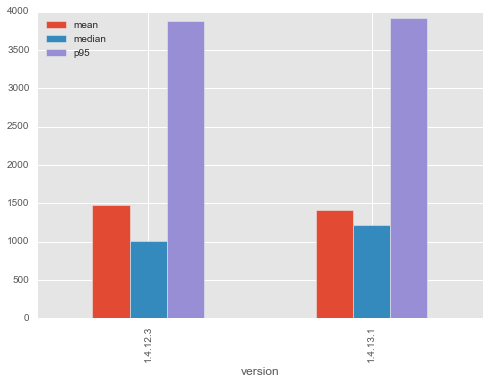

In [8]:
def p95(arr):
    return np.percentile(arr, 95)

cell_exec.groupby('version').agg([np.mean, np.median, p95])['totalDuration'].plot.bar()

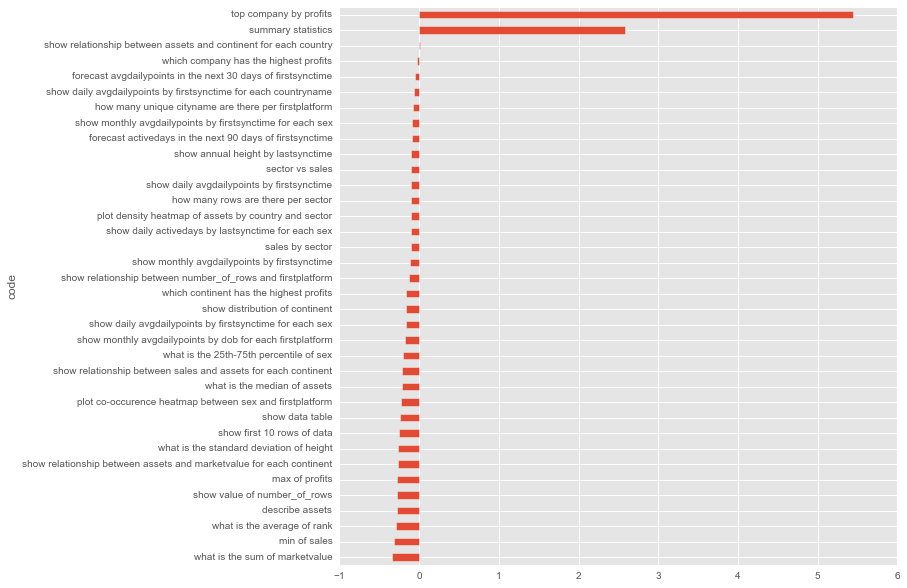

In [12]:
v12_mean = cell_exec[cell_exec['version'] == '1.4.12.3'].groupby('code').agg({'totalDuration': np.mean})
v13_mean = cell_exec[cell_exec['version'] == '1.4.13.1'].groupby('code').agg({'totalDuration': np.mean})

mean_diff = (v13_mean['totalDuration'] - v12_mean['totalDuration']) / v12_mean['totalDuration']
plt.figure(figsize=(10,10))
mean_diff.sort_values().plot.barh()

In [11]:
cell_exec[cell_exec.code == 'top company by profits'][['version', 'totalDuration']]

,version,totalDuration
119,1.4.12.3,692
244,1.4.12.3,488
539,1.4.12.3,658
101,1.4.13.1,3976
445,1.4.13.1,3812
525,1.4.13.1,4062


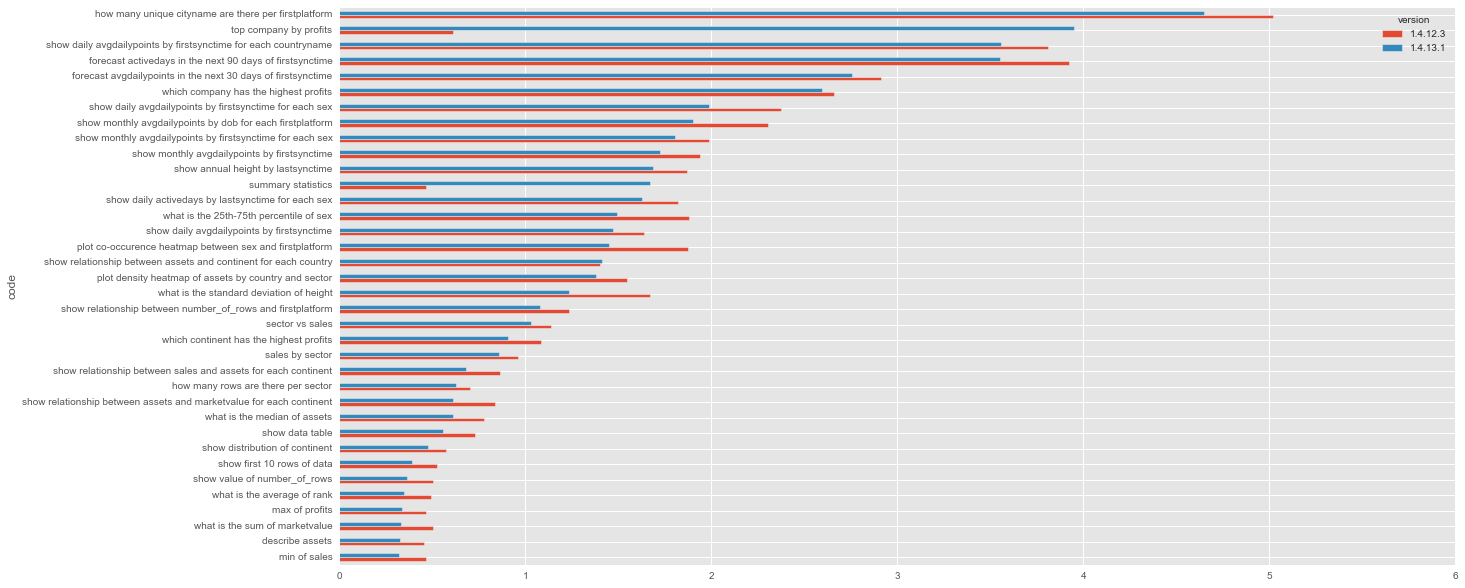

In [31]:
grp = cell_exec.groupby(['version', 'code'])[['totalDuration']].mean() / 1000
grp.unstack('version')['totalDuration'].sort_values('1.4.13.1').plot.barh(figsize=(20,10))